In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import os
os.chdir("/content/drive/My Drive")
os.getcwd()

'/content/drive/My Drive'

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking if null values are there
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#dropping the duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#displaying the first 5 rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


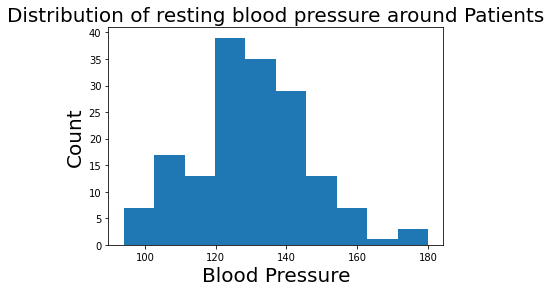

In [ ]:
#histogram plot using matplotlib
df_bp_heartattack = df[df['output'] == 1]
plt.hist(df_bp_heartattack['trtbps'])
plt.title("Distribution of resting blood pressure around Patients", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

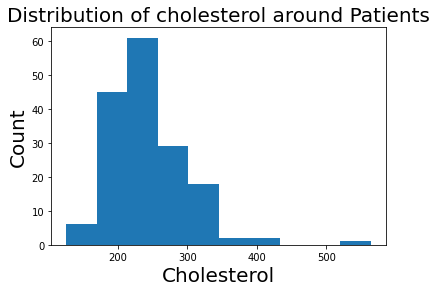

In [ ]:
#histogram plot using matplotlib
df_chol_heartattack = df[df['output'] == 1]
plt.hist(df_chol_heartattack['chol'])
plt.title("Distribution of cholesterol around Patients", fontsize=20)
plt.xlabel("Cholesterol", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

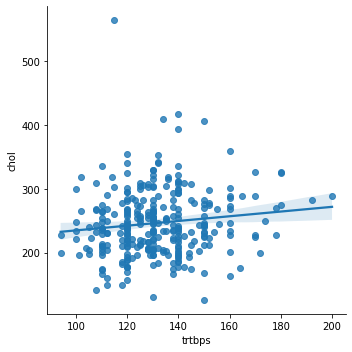

In [ ]:
#Scatter plot with regression line
scatter_plot_with_linefit=sns.lmplot(x='trtbps',y='chol',data=df,fit_reg=True)

In [ ]:
#Data Preprocessing
x=df.iloc[:, 1:-1].values 
y=df.iloc[:, -1].values

#Splitting the dataset into training and testing data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=0)

In [ ]:
#Feature Scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
#Model
model = LogisticRegression()
model.fit(x_train, y_train)
y_predicted=model.predict(x_test)
print ("The accuracy of Logistic Regression model is : ", accuracy_score(y_test, y_predicted)*100, "%")

The accuracy of Logistic Regression model is :  86.88524590163934 %
